In [1]:
import pandas as pd
files = sorted(['../input/food-prices-in-world/2- food-expenditure-per-person-per-year.csv',
    '../input/food-prices-in-world/4- share-calorie-diet-unaffordable.csv',
    '../input/food-prices-in-world/3- hare-of-consumer-expenditure-spent-on-food.csv',
    '../input/food-prices-in-world/1- share-healthy-diet-unaffordable.csv'])
dfs = [pd.read_csv(filepath_or_buffer=item) for item in files]

In [2]:
for df in dfs:
    print('{} {} {}'.format(df.shape, df.columns.tolist(), df['Year'].unique().tolist()) )

(763, 4) ['Entity', 'Code', 'Year', 'Share of the population who cannot afford a healthy diet'] [2017, 2018, 2019, 2020, 2021]
(520, 4) ['Entity', 'Code', 'Year', 'Total food expenditure'] [2017, 2018, 2019, 2020, 2021]
(520, 4) ['Entity', 'Code', 'Year', 'Food as share of total consumer expenditure'] [2017, 2018, 2019, 2020, 2021]
(155, 4) ['Entity', 'Code', 'Year', 'Share of the population who cannot afford sufficient calories'] [2017]


We have two different kinds of data: one related to people/diet, the other related to costs

In [3]:
names = [df.columns[3] for df in dfs]
means = [df.drop(columns=['Code', 'Year']).groupby(['Entity'])[names[index]].mean().to_frame() for index, df in enumerate(dfs)]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


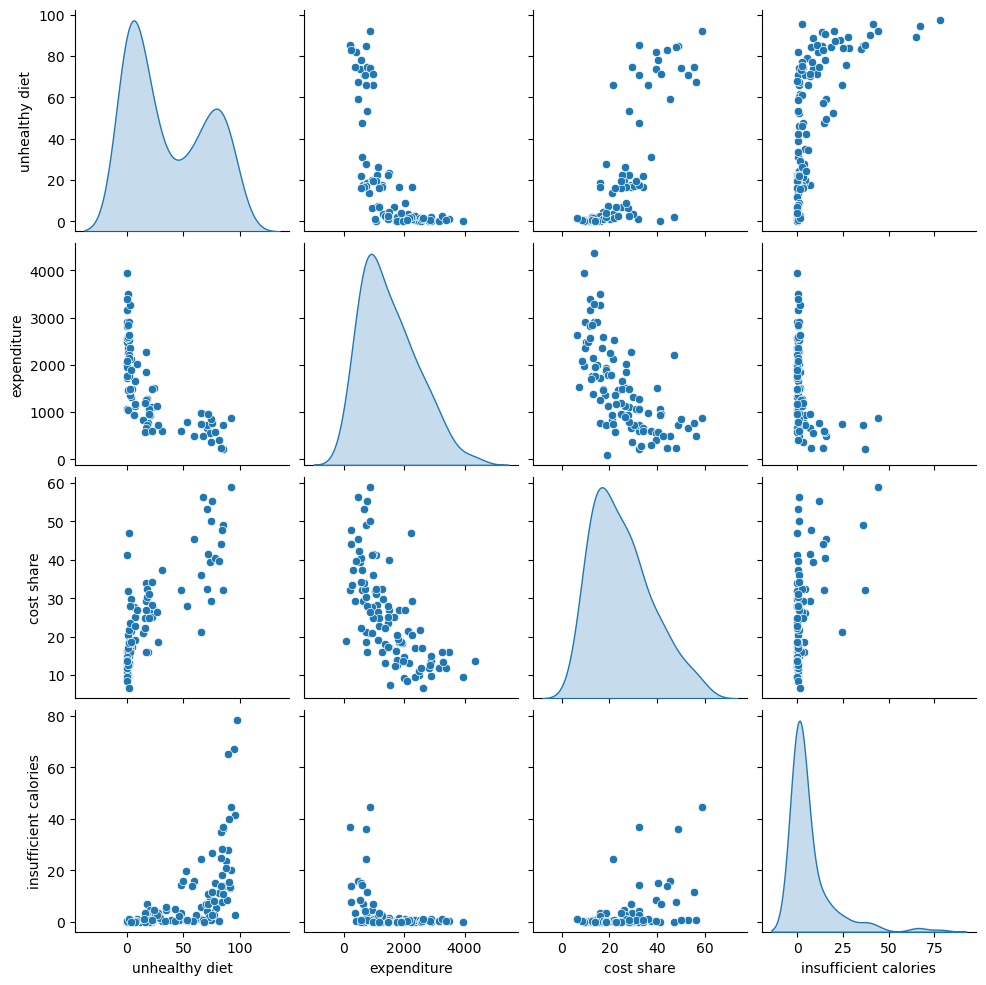

In [4]:
from seaborn import pairplot
means_df = pd.concat(objs=means, axis=1)
readable_names = ['unhealthy diet', 'expenditure', 'cost share', 'insufficient calories']
means_df = means_df.rename(columns={pair[0]: pair[1] for pair in zip(names, readable_names)})
pairplot(data=means_df, diag_kind='kde')